In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from fmincg import fmincg

# Data importing

In [2]:
data = loadmat('ex5data1.mat')

In [3]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']
m,n = X.shape

### plotting data

Text(0, 0.5, 'y')

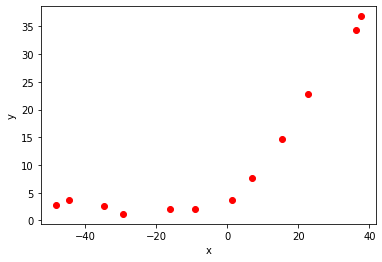

In [4]:
plt.figure(1)
plt.plot(X,y,'ro')
plt.xlabel('x')
plt.ylabel('y')

In [7]:
def linCostFunction(theta, X_inp, y, lamda=0):
    '''Cost function for linear regression
    dont add ones to X_inp'''
    m,n = X_inp.shape
    X = np.hstack((np.ones((m,1)) , X_inp))
    theta = theta.reshape((n+1,-1))
    y = y.reshape((m,-1))
    er= X@theta - y
    J = (0.5/m)*(er.T @ er)
    grad = (1/m) * (X.T @ er)
    if lamda !=0 :
        thetareg = theta.copy()
        thetareg[0]=0
        J += (lamda/(2*m))*(thetareg.T @ thetareg)
        grad += (1/m) * (lamda * thetareg)
    return J.item(),grad

def trainlinreg(X, y, lamda=0):
    '''function to train linear regression'''
    m,n = X.shape
    options = {'maxiter':200,'Gradobj':'on'}
    theta_pred,*_ = fmincg(lambda x : linCostFunction(x,X,y,lamda) 
                           , np.zeros((n+1,1)) 
                           , options)
    return theta_pred

def learningCurve(X, y, Xval, yval, lamda=0):
    '''function to track learning curve error values'''
    m,n = X.shape
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    for i in range(1,m):
        theta = trainlinreg(X[:i] , y[:i] ,lamda)
        error_train[i],_ = linCostFunction(theta,X[:i],y[:i])
        error_val[i],_ = linCostFunction(theta,Xval,yval)
    return error_train[1:],error_val[1:]

def addPolyfeatures(X,p=8,ones=False):
    '''function to generate polynomial order features for polynomial regression'''
    m,n = X.shape
    degree = p
    if ones:
        ret = np.hstack((np.ones((m,1)), X))
    else:
        ret = X
    
    for i in range(2,degree+1):
        ret = np.hstack((ret,X**i))
    return ret

def normalize(ip):
    mu = np.mean(ip,axis=0)
    sigma = np.std(ip,axis=0)
    return (ip-mu)/sigma , mu ,sigma

def validation(X, y, Xval, yval):
    '''function to find lamda for min error values'''
    m,n = X.shape
    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
    theta = list(map(lambda x :trainlinreg(X, y, x),lambda_vec))
    error_train = (list(map(lambda x: (linCostFunction(x, X, y))[0],theta)))
    error_val = (list(map(lambda x: (linCostFunction(x, Xval, yval))[0],theta)))
    return lambda_vec,error_train,error_val

In [9]:
#linCostFunction(np.array([[1],[1]]) ,X,y,1)
#(303.9931922202643,array([[-15.30301567],[598.25074417]]).T)

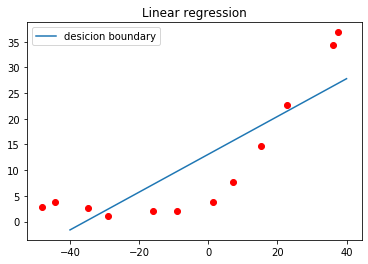

In [24]:
plt.figure()
plt.plot(X,y,'ro')
theta = trainlinreg(X,y,0)
sample = np.linspace(-40,40,100).reshape(-1,1)
plt.plot(sample, np.hstack((np.ones((100,1)),sample)) @ theta, label = 'desicion boundary')
plt.title('Linear regression')
plt.legend();

In [25]:
lamda = 0
error_train,error_val = learningCurve(X,y,Xval,yval,lamda)

E:\Priyant\ML_andrew\python implementaton\ex5\fmincg.py:116: RuntimeWarning: invalid value encountered in true_divide
  z2 = (np.sqrt(np.dot(B, B)-np.dot(np.dot(np.dot(A,d2),z3),z3))-B)/A       # numerical error possible - ok!
E:\Priyant\ML_andrew\python implementaton\ex5\fmincg.py:136: RuntimeWarning: invalid value encountered in true_divide
  z2 = -np.dot(np.dot(d2,z3),z3)/(B+np.sqrt(np.dot(B,B)-np.dot(np.dot(np.dot(A,d2),z3),z3)))        # num. error possible - ok!
E:\Priyant\ML_andrew\python implementaton\ex5\fmincg.py:136: RuntimeWarning: invalid value encountered in sqrt
  z2 = -np.dot(np.dot(d2,z3),z3)/(B+np.sqrt(np.dot(B,B)-np.dot(np.dot(np.dot(A,d2),z3),z3)))        # num. error possible - ok!


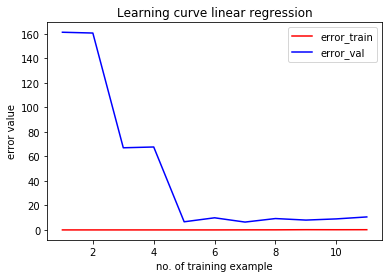

In [34]:
plt.figure(2)
plt.plot(np.arange(1,m) , error_train.ravel(),'r',label = 'error_train')
plt.plot(np.arange(1,m) , error_val.ravel(),'b',label = 'error_val')
plt.title('Learning curve linear regression')
plt.ylabel('error value')
plt.xlabel('no. of training example')
plt.legend();

In [35]:
X_poly,mu,sigma = normalize(addPolyfeatures(X))
Xtest_poly = (addPolyfeatures(Xtest) - mu)/sigma
Xval_poly = (addPolyfeatures(Xval) - mu)/sigma

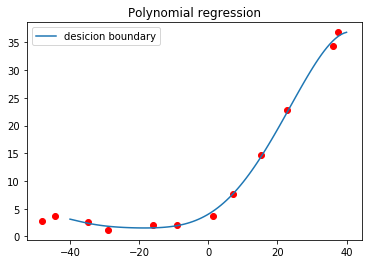

In [36]:
plt.figure()
plt.plot(X,y,'ro')
theta = trainlinreg(X_poly,y,0)
sample = np.linspace(-40,40,100).reshape(-1,1)
plt.plot(sample, np.hstack((np.ones((100,1)),(addPolyfeatures(sample) - mu)/sigma)) @ theta, label = 'desicion boundary')
plt.title('Polynomial regression')
plt.legend();

In [37]:
lamda = 0
error_train,error_val = learningCurve(X_poly,y,Xval_poly,yval,lamda)

E:\Priyant\ML_andrew\python implementaton\ex5\fmincg.py:136: RuntimeWarning: invalid value encountered in true_divide
  z2 = -np.dot(np.dot(d2,z3),z3)/(B+np.sqrt(np.dot(B,B)-np.dot(np.dot(np.dot(A,d2),z3),z3)))        # num. error possible - ok!


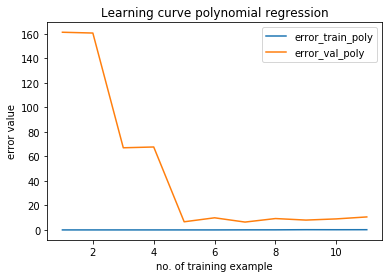

In [38]:
plt.figure(2)
plt.plot(np.arange(1,m) , error_train.ravel(),label = 'error_train_poly')
plt.plot(np.arange(1,m) , error_val.ravel(),label = 'error_val_poly')
plt.title('Learning curve polynomial regression')
plt.ylabel('error value')
plt.xlabel('no. of training example')
plt.legend();

In [40]:
lambda_vec,error_train,error_val = validation(X_poly, y, Xval_poly, yval)

E:\Priyant\ML_andrew\python implementaton\ex5\fmincg.py:116: RuntimeWarning: invalid value encountered in true_divide
  z2 = (np.sqrt(np.dot(B, B)-np.dot(np.dot(np.dot(A,d2),z3),z3))-B)/A       # numerical error possible - ok!
E:\Priyant\ML_andrew\python implementaton\ex5\fmincg.py:136: RuntimeWarning: invalid value encountered in sqrt
  z2 = -np.dot(np.dot(d2,z3),z3)/(B+np.sqrt(np.dot(B,B)-np.dot(np.dot(np.dot(A,d2),z3),z3)))        # num. error possible - ok!


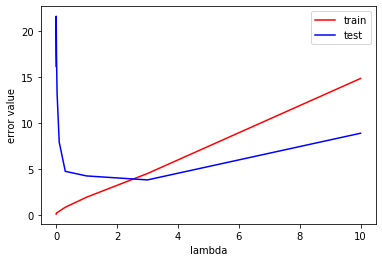

In [41]:
plt.figure()
plt.plot(lambda_vec ,error_train , 'r', label = 'train')
plt.plot(lambda_vec,error_val ,'b', label = 'test' )
plt.xlabel('lambda')
plt.ylabel('error value')
plt.legend();